In [19]:
pip install --upgrade seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# 1. Introduction

# 2. Understanding the Data and the structure

To understand the data better, we should first display the initial rows of the dataset to visualize its structure.

### I. Visualize the Data

##### a) Abhishek_data

In [21]:
file_path_1 = 'abhishek_data.csv'
data_1 = pd.read_csv(file_path_1)
data_1.head()

,"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham\tOk lar... Joking wif u oni...
1,spam\tFree entry in 2 a wkly comp to win FA Cu...
2,ham\tU dun say so early hor... U c already the...
3,"ham\tNah I don't think he goes to usf, he live..."
4,spam\tFreeMsg Hey there darling it's been 3 we...


##### b) Assumewisely_data

In [22]:
file_path_2 = 'assumewisely_data.tsv'
data_2 = pd.read_csv(file_path_2, sep='\t')
data_2.head()

,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


##### c) bwandowando_data

In [23]:
file_path_3 = 'bwandowando_data.csv'
data_3 = pd.read_csv(file_path_3)
data_3.head()

,Unnamed: 0,masked_celphone_number,hashed_celphone_number,date,text,carrier
0,0,+63960****373,91caa5d6-1f97-3a2d-982b-5b0c021632ab,2022-11-12 14:02:10.079,"Welcome ! your have P1222 for S!ot , \nWeb: 11...",Smart
1,1,+63981****852,f66589b7-4e6a-33ba-b7c5-d0dacb48552b,2022-11-12 14:33:48.916,"My god, at least 999P rewards waiting for you\...",Smart
2,2,+63946****113,1f332ce5-618e-32e6-b2ab-8e567917aeef,2022-11-13 23:03:15.023,"DEAR VIP <REAL NAME>, No. 1 Online Sabong Site...",TNT
3,3,+63950****934,5e6fcdc3-b2b8-3f71-b411-cacb8d40a0b9,2022-11-14 00:07:18.715,"<REAL NAME>! Today, you can win the iphone14PR...",TNT
4,4,+63960****401,aafa248f-04ef-3005-a672-db79286919ee,2022-11-15 02:28:56.636,"Welcome ! your have P1222 for S!ot , \nWeb: gr...",Smart


##### d) Scottleechua_data

In [24]:
file_path_4 = 'scottleechua_data.csv'
data_4 = pd.read_csv(file_path_4)
data_4.head()

,date-received,date-read,sender,category,text
0,2024-02-05 18:11:17,2024-02-05 18:11:24,+6390998***20,spam,"Make money while watching YouTube, earn 500P p..."
1,2023-03-28 16:28:37,2023-03-28 16:28:48,GCash,ads,Get up to P125K extra funds for emergencies wi...
2,2023-03-29 16:45:31,2023-03-29 16:45:38,GCash,notifs,<REDACTED>
3,2023-03-29 17:17:32,2023-03-29 17:17:43,GCash,notifs,<REDACTED>
4,2023-03-30 10:16:02,2023-03-30 10:16:03,GCash,OTP,<REDACTED>


##### e) uciml_data

In [25]:
file_path_5 = 'uciml_data.csv'
data_5 = pd.read_csv(file_path_5,encoding='ISO-8859-1')
data_5.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


##### f) vivekchutke_data

In [26]:
file_path_6 = 'vivekchutke_data.csv'
data_6 = pd.read_csv(file_path_6)
data_6.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


# 3. Cleaning the Data

### I. Clean the data to make them similar

##### a) Abhishek_data

In [27]:
with open(file_path_1, 'r') as file:
    lines = file.readlines()
processed_data = []

for line in lines:
    line = line.strip().strip('"')  # Remove leading/trailing whitespaces and quotes
    type_msg = line.split('\t', 1)  # Split on the first tab character
    if len(type_msg) == 2:  # Ensure there are exactly two elements
        processed_data.append(type_msg)

# Create a DataFrame from the cleaned data
data_1_updated = pd.DataFrame(processed_data, columns=['Category', 'Text'])

# Show the head of the data for verification
data_1_updated.head()

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##### b) Assumewisely_data

In [28]:
data_2_updated = pd.read_csv(file_path_2, delimiter='\t', names=['Category', 'Text'])
data_2_updated.head()

,Category,Text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


##### c) bwandowando_data

In [29]:
data_3['Category'] = 'spam'
data_3.rename(columns={'text': 'Text'}, inplace=True)
data_3_updated = data_3[['Category', 'Text']]
data_3_updated.head()

,Category,Text
0,spam,"Welcome ! your have P1222 for S!ot , \nWeb: 11..."
1,spam,"My god, at least 999P rewards waiting for you\..."
2,spam,"DEAR VIP <REAL NAME>, No. 1 Online Sabong Site..."
3,spam,"<REAL NAME>! Today, you can win the iphone14PR..."
4,spam,"Welcome ! your have P1222 for S!ot , \nWeb: gr..."


##### d) Scottleechua_data

In [30]:
data_4.rename(columns={'text': 'Text'}, inplace=True)
data_4.rename(columns={'category': 'Category'}, inplace=True)
data_4_updated = data_4[['Category', 'Text']]
data_4_updated.head()

,Category,Text
0,spam,"Make money while watching YouTube, earn 500P p..."
1,ads,Get up to P125K extra funds for emergencies wi...
2,notifs,<REDACTED>
3,notifs,<REDACTED>
4,OTP,<REDACTED>


##### e) uciml_data

In [31]:
data_5_updated = pd.DataFrame({
    'Category': data_5['v1'],
    'Text': data_5['v2']
})
data_5_updated.head()

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##### f) vivekchutke_data

In [32]:
data_6.rename(columns={'type': 'Category'}, inplace=True)
data_6.rename(columns={'text': 'Text'}, inplace=True)
data_6_updated = data_6[['Category', 'Text']]
data_6_updated.head()

,Category,Text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


### I. Combine all the data into a single CSV

In [33]:
data_cleaned = pd.concat([data_1_updated, data_2_updated,data_3_updated,
                           data_4_updated,data_5_updated,data_6_updated], 
                          ignore_index=True)
data_cleaned.to_csv('combined_data.csv', index=False)
data_cleaned.head()

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


To understand the data in hand also we check for Null values in the data.

In [34]:
# Check for missing values
missing_values = data_cleaned.isnull().sum()

# Get a summary of the dataset
data_summary = data_cleaned.describe(include='all')

missing_values, data_summary


(Category    0
 Text        0
 dtype: int64,
        Category        Text
 count     26356       26356
 unique        6        7945
 top         ham  <REDACTED>
 freq      19286        2566)

#### Missing Values:
##### Category: No missing values.
##### Text: No missing values.

#### Data Summary:
##### Category: 6 unique values with "ham" being the most frequent (19286 occurrences).
##### Text: 7945 unique texts with the most frequent text "< REDACTED >" appearing 2566 times.

# 4. Univariate Analysis

Now let's explore the distribution of the "Category" variable and examine some basic statistics for the "Text" column.

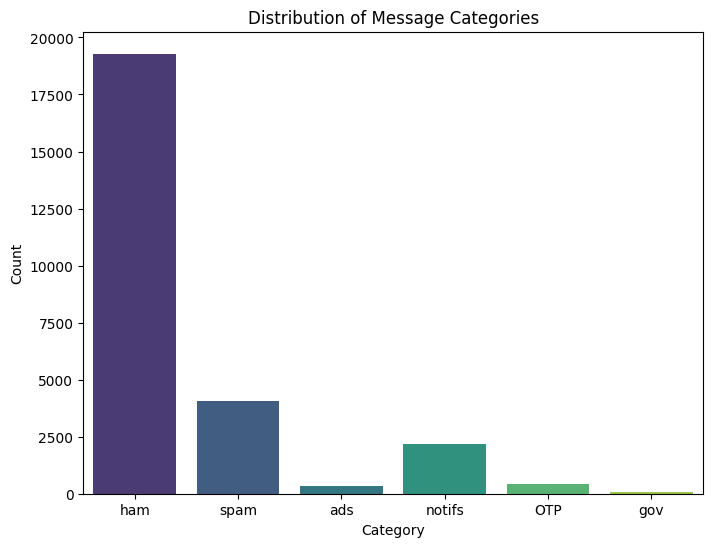

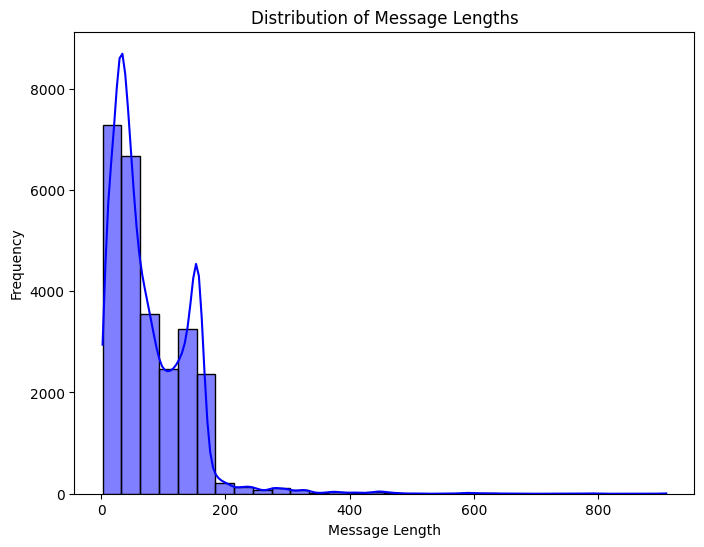

(Category
 ham       19286
 spam       4080
 notifs     2162
 OTP         406
 ads         356
 gov          66
 Name: count, dtype: int64,
 count    26356.000000
 mean        77.339316
 std         64.338837
 min          2.000000
 25%         31.000000
 50%         57.000000
 75%        121.000000
 max        910.000000
 Name: Text_length, dtype: float64)

In [35]:
# Univariate Analysis: Distribution of "Category"
category_counts = data_cleaned['Category'].value_counts()

# Plot the distribution of categories
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=data_cleaned, hue='Category', palette='viridis', legend=False)
plt.title('Distribution of Message Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Univariate Analysis: Length of messages
data_cleaned.loc[:, 'Text_length'] = data_cleaned['Text'].apply(len)
text_length_summary = data_cleaned['Text_length'].describe()

# Plot the distribution of text lengths
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['Text_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

category_counts, text_length_summary

### Univariate Analysis Results
Distribution of Message Categories

ham: 19286

notifs: 2162

spam: 4080

OTP: 406

ads: 356

gov: 66

### Distribution of Message Lengths
Count: 26356 messages

Mean: 77.34 characters

Standard Deviation: 64.34 characters

Min: 2 characters

25th Percentile: 31 characters

50th Percentile (Median): 57 characters

75th Percentile: 112 characters

Max: 910 characters

# 5.  Bivariate Analysis

Now let us explore more on the relationship between the two variables "Category" and "Text"

1. We can analyse this by looking at the Word frequency in spam vs. ham messages.

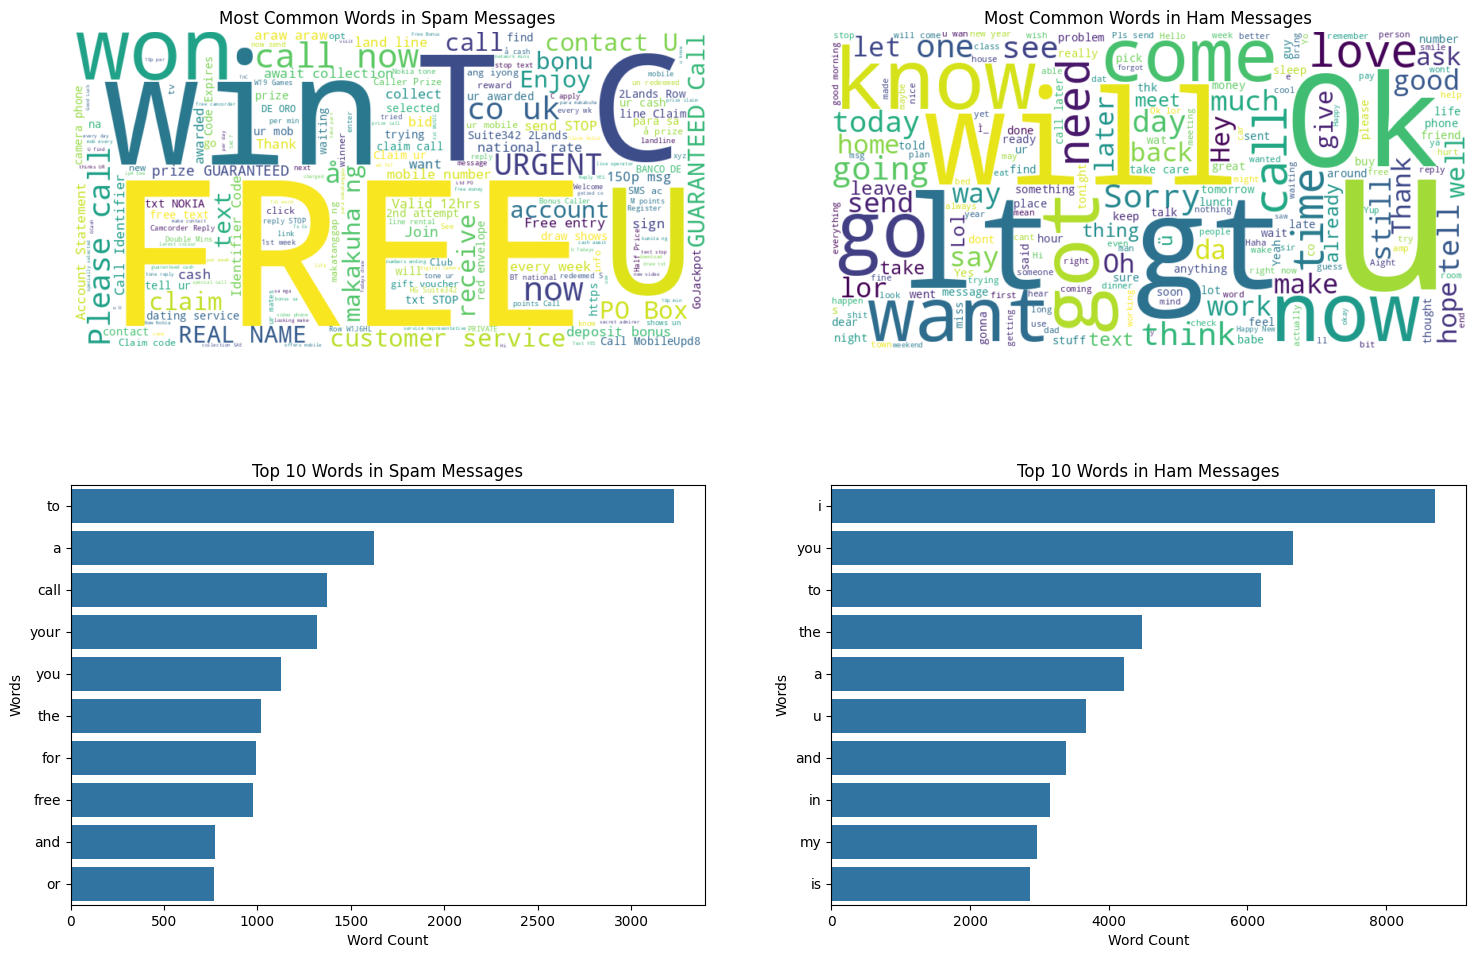

In [36]:
data_cleaned['Category'] = data_cleaned['Category'].astype('category')

def get_top_n_words(text_data, n=10):
    all_words = ' '.join(text_data).lower().split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

top_spam_words = get_top_n_words(data_cleaned[data_cleaned['Category'] == 'spam']['Text'])
top_ham_words = get_top_n_words(data_cleaned[data_cleaned['Category'] == 'ham']['Text'])

spam_words, spam_counts = zip(*top_spam_words)
ham_words, ham_counts = zip(*top_ham_words)

spam_words_str = ' '.join(data_cleaned[data_cleaned['Category'] == 'spam']['Text'])
ham_words_str = ' '.join(data_cleaned[data_cleaned['Category'] == 'ham']['Text'])

spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words_str)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words_str)

# Plot word clouds and top words
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Spam Messages')

plt.subplot(2, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Ham Messages')

plt.subplot(2, 2, 3)
sns.barplot(x=list(spam_counts), y=list(spam_words))
plt.title('Top 10 Words in Spam Messages')
plt.xlabel('Word Count')
plt.ylabel('Words')

plt.subplot(2, 2, 4)
sns.barplot(x=list(ham_counts), y=list(ham_words))
plt.title('Top 10 Words in Ham Messages')
plt.xlabel('Word Count')
plt.ylabel('Words')

plt.show()

### Word Frequency in Spam vs. Ham Messages
#### The word clouds highlight the most frequently occurring words in spam and ham messages:

##### 1. Spam Messages: Common words likely include promotional terms and phrases related to offers, prizes, or calls to action. Words such as Free, Call, Win, and Claim. 

##### 2. Ham Messages: Common words are more likely related to casual conversation or personal communication.